# generating variants of a maze with varying endpoints

In [1]:
# other package imports
import matplotlib.pyplot as plt # keep this import for CI to work
from zanj import ZANJ # saving/loading data
from muutils.mlutils import pprint_summary # pretty printing as json

# maze_dataset imports
from maze_dataset import LatticeMaze, SolvedMaze, MazeDataset, MazeDatasetConfig
from maze_dataset.generation import LatticeMazeGenerators, GENERATORS_MAP
from maze_dataset.generation.default_generators import DEFAULT_GENERATORS
from maze_dataset.dataset.configs import MAZE_DATASET_CONFIGS
from maze_dataset.plotting import plot_dataset_mazes, print_dataset_mazes

# check the configs
print(MAZE_DATASET_CONFIGS.keys())
# for saving/loading things
LOCAL_DATA_PATH: str = "../data/maze_dataset/"
zanj: ZANJ = ZANJ(external_list_threshold=256)

dict_keys(['test-g3-n5-a_dfs-h75556', 'demo_small-g3-n100-a_dfs-h88371', 'demo-g6-n10K-a_dfs-h30615'])


You should always see `test-g3-n5-a_dfs-h9136` in the list of available dataset configs above.

Now, let's set up our initial config and dataset:

In [2]:
cfg: MazeDatasetConfig = MazeDatasetConfig(
	name="vary_endpoint",
	grid_n=5,
	n_mazes=16,
	maze_ctor=LatticeMazeGenerators.gen_dfs,
	maze_ctor_kwargs=dict(do_forks=False),
)

# each config will use this function to get the name of the dataset
# it contains some basic info about the algorithm, size, and number of mazes
# at the end after "h" is a stable hash of the config to avoid collisions
print(cfg.to_fname())

vary_endpoint-g5-n16-a_dfs-h27816


In [3]:
# to create a dataset, just call MazeDataset.from_config
dataset: MazeDataset = MazeDataset.from_config(
    # your config
	cfg,
    # and all this below is completely optional
	do_download=False,
	load_local=False,
	do_generate=True,
    save_local=True,
	local_base_path=LOCAL_DATA_PATH,
	verbose=True,
	zanj=zanj,
	gen_parallel=False, # parallel generation has overhead, not worth it unless you're doing a lot of mazes
)

trying to get the dataset 'vary_endpoint-g5-n16-a_dfs-h27816'
generating dataset...


generating & solving mazes: 100%|██████████| 16/16 [00:00<00:00, 1641.89maze/s]

saving dataset to ../data/maze_dataset/vary_endpoint-g5-n16-a_dfs-h27816.zanj
Got dataset vary_endpoint with 16 items. output.cfg.to_fname() = 'vary_endpoint-g5-n16-a_dfs-h27816'


now that we have our dataset, let's take a look at it!

(<Figure size 1600x200 with 16 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object))

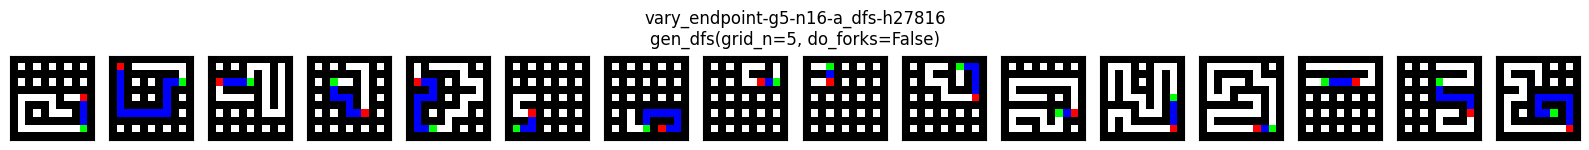

In [4]:
plot_dataset_mazes(dataset, count=None) # for large datasets, set the count to some int to just plot the first few

# varying the endpoint of a maze

In [5]:
maze: SolvedMaze = dataset[0]

print(maze.as_ascii())

print(maze.generation_meta)

lattice_maze: LatticeMaze = LatticeMaze(
	connection_list=maze.connection_list,
	generation_meta=maze.generation_meta,
)

###########
# # # # # #
###########
# # # # # #
###########
#     #  E#
# ### ###X#
# # #   #X#
# #######X#
#        S#
###########
{'func_name': 'gen_dfs', 'grid_shape': array([5, 5]), 'start_coord': array([2, 3]), 'n_accessible_cells': 25, 'max_tree_depth': 50, 'fully_connected': False, 'visited_cells': {(4, 4), (2, 4), (4, 0), (2, 1), (3, 4), (4, 3), (2, 0), (4, 2), (3, 0), (2, 3), (3, 3), (2, 2), (3, 2), (4, 1)}}


(<Figure size 2000x200 with 20 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >], dtype=object))

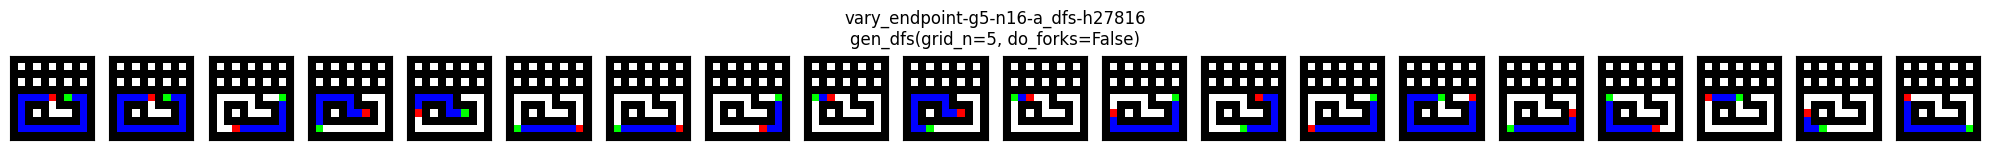

In [6]:

variants: list[SolvedMaze] = [
	SolvedMaze(
		connection_list=lattice_maze.connection_list,
		generation_meta=lattice_maze.generation_meta,
		solution=lattice_maze.generate_random_path(),
	)
	for _ in range(20)
]
variants_dataset = MazeDataset(
	cfg=dataset.cfg,
	mazes=variants,
)
plot_dataset_mazes(variants_dataset)



(<Figure size 1700x200 with 17 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object))

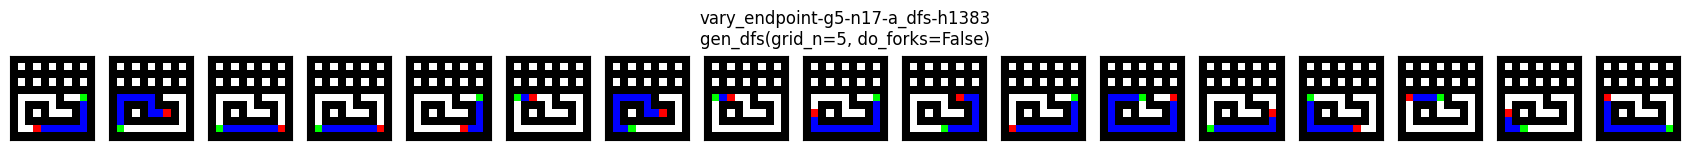

In [7]:
dataset_filtered: MazeDataset = variants_dataset.custom_maze_filter(
	lambda m : len(m.get_coord_neighbors(m.start_pos)) > 1
)

plot_dataset_mazes(dataset_filtered)